# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.140448e+01     7.897242e+00
 * time: 0.0021181106567382812
     1     2.746620e+01     4.779518e+00
 * time: 0.008645057678222656
     2     1.880554e+01     4.839782e+00
 * time: 0.01598215103149414
     3     1.231603e+01     2.950797e+00
 * time: 0.023231983184814453
     4     1.021262e+01     2.197366e+00
 * time: 0.02892899513244629
     5     9.472922e+00     1.190198e+00
 * time: 0.03466200828552246
     6     9.010467e+00     8.147707e-01
 * time: 0.04021310806274414
     7     8.638426e+00     8.470729e-01
 * time: 0.04593300819396973
     8     8.349154e+00     5.400707e-01
 * time: 0.05213212966918945
     9     8.209267e+00     5.000296e-01
 * time: 0.058593034744262695
    10     8.156788e+00     7.610990e-01
 * time: 0.06337809562683105
    11     8.137017e+00     6.598194e-01
 * time: 0.06817412376403809
    12     8.109371e+00     6.592308e-01
 * time: 0.0730440616607666
    13     8.049614e+00     4.596516e-01
 * t

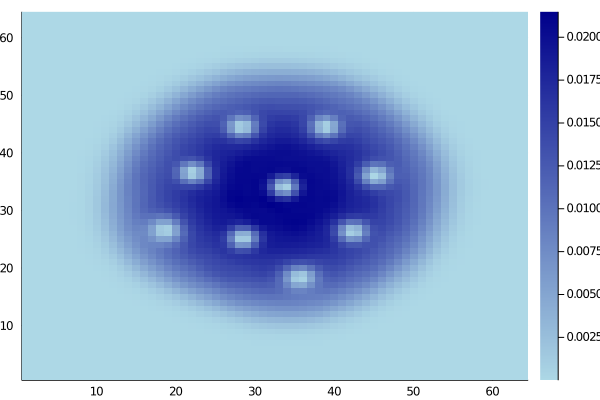

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)